Analysis of potential patterns within imprinted genes

Graduate School for Interdisciplinary Studies<br>
    MSc in Digital Health<br>
    GD5999 End of Degree: Dissertation<br>
    Student Number: 200034984

Imports

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Reusable Vars

In [2]:
#Trait names for reading in files
traits = ["Allergy", "Anthropometric", "Birth", "Blood", "Cancer", "Cardiovascular", "Cholesterol", 
          "Dental", "Diabetes", "Digestive", "Drug-Response", "Education-Intelligence", "Facial-Morphology", 
          "Female-Reproductive-System", "Genetic-Regulation", "Hormone", "Immune", "Kidney", "Liver", 
          "Longevity",  "Male-Reproductive-System", "Mental-Behavorial", "Metabolism", "Nervous-System", 
          "Orthopaedic", "Respiratory", "Sensory-System", "Skin", "Sleep", "Vitamin"]
#Trait names for output tables
output_traits = ["Allergy", "Anthropometric", "Birth", "Blood", "Cancer", "Cardiovascular", "Cholesterol", 
              "Dental", "Diabetes", "Digestive", "Drug Response", "Education Intelligence", "Facial Morphology", 
              "Female Reproductive System", "Genetic Regulation", "Hormone", "Immune", "Kidney", "Liver", 
              "Longevity", "Male Reproductive System", "Mental or Behavorial", "Metabolism", "Nervous System", 
              "Orthopaedic", "Respiratory", "Sensory System", "Skin", "Sleep", "Vitamin"]

#Column headings to extract CSV collumns
#Column names for the GWAS association files of imprinted
column_names_general = ["ID", "Gene", "Gene2", "Parent", "VRA", "_value", "P_value_annotation", "RAF", "OR", "Beta", 
                        "CI", "MappedGene", "Reported_trait", "Trait", "Study_accession", "Location", "Grouping"]
#Column names for the GWAS association files of Whole Genome
column_names_all = ["VRA", "P-value", "P-value-annotation", "RAF", "OR", "Beta", "CI", "Gene", "Reported_trait", "Trait", 
                    "Study_accession", "Location"]
#Column names for the Genebass file
column_names_LoF = ["ID", "Gene", "Status", "Description", "Phenotype", "Trait_type", "Sex", "Category", "Info", 
                    "N_cases", "N_controls", "P_Value", "Beta", "analysis_id", "Grouping"]

#Total number of each imprinting status genes in GWAS and in the whole genome
no_whole_genome = 22154
no_imprint_genes = 87
no_paternal = 49
no_maternal = 33
no_random = 1
no_notspecified = 4

no_lof_paternal = 15
no_lof_maternal = 12
no_lof_total = 27

Runs def for each trait type

Defintion to find unique Genes - used for imprinted, random and Lof datasets

In [3]:
#Reusable definition to extract number of genes with each trait type
def findUniqueGenes(status, col_names, cat, start, stop):
    genes = []
    #Reads in CSV file
    #Data source - NHGRI, 2021. GWAS Catalog. [online] Ebi.ac.uk. Available at: <https://www.ebi.ac.uk/gwas/> [Accessed 31 July 2021].
    df = pd.read_csv("data/%s-Assocation.csv"%status, names=col_names)
    #Stores genes and phenotype group to lists
    list_genes = df.Gene.to_list()
    #Selects rows for trait from list
    for g in range(start, stop):
        #Appends to genes array
        genes.append(list_genes[g])
    #Creates a numpyt array
    x = np.array(genes)
    #Finds uniquevalues in numpy array
    unique_imprint = np.unique(x)
    
    #Gets lenght of array of unique genes
    length = len(unique_imprint)
    #Appends number of unique genes within each trait to total_genes array
    total_genes.append(length)
    
    #Coverts numpy array back to list so it can be saved
    save = list(unique_imprint)
    #Adds collum heading to list for CSV file
    save.insert(0,"Unique Genes")
    #Saves each unique gene associated to trait to file
    np.savetxt("Output/{}/{}.csv".format(status, cat), save, delimiter =", ", fmt ='% s')
    #Prints trait then number of unique genes
    print("{}: {}".format(cat, length))
    return

Section 1: Imprinted Genes - Analysis

1.1 Find number of paternally imprinted genes associated to traits

In [4]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Paternal-Imprint"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Paternal imprinted total gene assocations for each trait")

#Allergy
#Names trait
cat = traits[0]
#Selects allergy rows of list. Start and Stop choose which rows to use
start, stop = 1, 12
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Repeats for remaining traits
#Anthropometric
cat = traits[1]
start, stop = 12, 293
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 293, 313
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 313, 534
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 534, 621
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 621, 676
findUniqueGenes(status, col_names, cat, start, stop)

#Cholestol
cat = traits[6]
start, stop = 676, 684
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 684, 687
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 687, 812
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive
cat = traits[9]
start, stop = 812, 842
findUniqueGenes(status, col_names, cat, start, stop)

#Drug-Response
cat = traits[10]
start, stop = 842, 890
findUniqueGenes(status, col_names, cat, start, stop)

#Education-Intelligence
cat = traits[11]
start, stop = 890, 927
findUniqueGenes(status, col_names, cat, start, stop)

#Facial-Morphology
cat = traits[12]
start, stop = 927, 936
findUniqueGenes(status, col_names, cat, start, stop)

#Female-Reproductive-System
cat = traits[13]
start, stop = 936, 1012
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic-Regulation
cat = traits[14]
start, stop = 1012, 1017
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 1017, 1093
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 1093, 1191
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 1191, 1266
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 1266, 1283
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 1283, 1285
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 1285, 1327
findUniqueGenes(status, col_names, cat, start, stop)

#Mental-Behavorial
cat = traits[21]
start, stop = 1327, 1415
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 1415, 1461
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous-System
cat = traits[23]
start, stop = 1461, 1525
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 1525, 1557
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 1557, 1596
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory-System
cat = traits[26]
start, stop = 1596, 1650
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 1650, 1652
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 1652, 1663
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 1663, 1664
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n
#Saves totals to list for use later
paternal_imprint_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Paternal: ",sum)

Paternal imprinted total gene assocations for each trait
Allergy: 5
Anthropometric: 28
Birth: 8
Blood: 27
Cancer: 18
Cardiovascular: 21
Cholesterol: 4
Dental: 3
Diabetes: 14
Digestive: 11
Drug-Response: 17
Education-Intelligence: 10
Facial-Morphology: 3
Female-Reproductive-System: 17
Genetic-Regulation: 3
Hormone: 11
Immune: 17
Kidney: 9
Liver: 11
Longevity: 2
Male-Reproductive-System: 9
Mental-Behavorial: 20
Metabolism: 13
Nervous-System: 22
Orthopaedic: 16
Respiratory: 12
Sensory-System: 12
Skin: 1
Sleep: 6
Vitamin: 1

Total Paternal:  351


1.2 Find number of maternally imprinted genes associated to traits

In [5]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Maternal-Imprint"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Maternal imprinted total gene assocations for each trait")

#Allergy
#Names trait
cat = traits[0]
#Selects allergy rows of list
start, stop = 1, 6
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Anthropometric
cat = traits[1]
start, stop = 6, 181
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 181, 196
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 196, 291
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 291, 327
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 327, 621
findUniqueGenes(status, col_names, cat, start, stop)

#Cholesterol
cat = traits[6]
start, stop = 621, 668
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 668, 668
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 668, 770
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive System
cat = traits[9]
start, stop = 770, 778
findUniqueGenes(status, col_names, cat, start, stop)

#Drug Response
cat = traits[10]
start, stop = 778, 804
findUniqueGenes(status, col_names, cat, start, stop)

#Educational and Intelligence
cat = traits[11]
start, stop = 804, 826
findUniqueGenes(status, col_names, cat, start, stop)

#Facial Morphology
cat = traits[12]
start, stop = 826, 833
findUniqueGenes(status, col_names, cat, start, stop)

#Female Reproductive System
cat = traits[13]
start, stop = 833, 847
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic Regulation
cat = traits[14]
start, stop = 847, 852
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 852, 880
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 880, 908
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 908, 952
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 952, 988
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 988, 994
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 994, 1008
findUniqueGenes(status, col_names, cat, start, stop)

#Mental or Behavioural Disorders
cat = traits[21]
start, stop = 1008, 1074
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 1074, 1097
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous System
cat = traits[23]
start, stop = 1097, 1152
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 1152, 1177
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 1177, 1200
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory System
cat = traits[26]
start, stop = 1200, 1215
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 1215, 1216
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 1216, 1224
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 1224, 1225
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n
maternal_imprint_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Maternal: ",sum)

Maternal imprinted total gene assocations for each trait
Allergy: 3
Anthropometric: 15
Birth: 5
Blood: 20
Cancer: 13
Cardiovascular: 13
Cholesterol: 5
Dental: 0
Diabetes: 13
Digestive: 6
Drug-Response: 11
Education-Intelligence: 9
Facial-Morphology: 6
Female-Reproductive-System: 7
Genetic-Regulation: 2
Hormone: 3
Immune: 14
Kidney: 5
Liver: 8
Longevity: 3
Male-Reproductive-System: 5
Mental-Behavorial: 11
Metabolism: 10
Nervous-System: 12
Orthopaedic: 13
Respiratory: 10
Sensory-System: 6
Skin: 1
Sleep: 3
Vitamin: 1

Total Maternal:  233


1.3 Find number of randomly imprinted genes associated to traits

In [6]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Random-Imprint"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Random imprinted total gene assocations for each trait")

#Names trait
#Random only has two genes to two traits - other results were included to maintain output array formatting
#Allergy
#Names trait
cat = traits[0]
#Selects allergy rows of list
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)


#Anthropometric
cat = traits[1]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
#Selects allergy rows of list
start, stop = 1, 3
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Cholesterol
cat = traits[6]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive System
cat = traits[9]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Drug Response
cat = traits[10]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Educational and Intelligence
cat = traits[11]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Facial Morphology
cat = traits[12]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Female Reproductive System
cat = traits[13]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic Regulation
cat = traits[14]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Mental or Behavioural Disorders
cat = traits[21]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 3, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous System
cat = traits[23]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory System
cat = traits[26]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 1, 1
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n    
random_imprint_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Random: ",sum)

Random imprinted total gene assocations for each trait
Allergy: 0
Anthropometric: 0
Birth: 0
Blood: 1
Cancer: 0
Cardiovascular: 0
Cholesterol: 0
Dental: 0
Diabetes: 0
Digestive: 0
Drug-Response: 0
Education-Intelligence: 0
Facial-Morphology: 0
Female-Reproductive-System: 0
Genetic-Regulation: 0
Hormone: 0
Immune: 0
Kidney: 0
Liver: 0
Longevity: 0
Male-Reproductive-System: 0
Mental-Behavorial: 0
Metabolism: 1
Nervous-System: 0
Orthopaedic: 0
Respiratory: 0
Sensory-System: 0
Skin: 0
Sleep: 0
Vitamin: 0

Total Random:  2


1.4 Find number of not specified  imprinted genes associated to traits

In [7]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Not-Specified-Imprint"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Not Specified imprinted total gene assocations for each trait")

#Allergy
cat = traits[0]
#Selects allergy rows
start, stop = 1, 21
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Anthropometric
cat = traits[1]
start, stop = 21, 55
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 55, 59
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 59, 197
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 197, 266
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 266, 312
findUniqueGenes(status, col_names, cat, start, stop)

#Cholesterol
cat = traits[6]
start, stop = 312, 392
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 392, 392
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 392, 434
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive System
cat = traits[9]
start, stop = 434, 441
findUniqueGenes(status, col_names, cat, start, stop)

#Drug Response
cat = traits[10]
start, stop = 441, 449
findUniqueGenes(status, col_names, cat, start, stop)

#Educational and Intelligence
cat = traits[11]
start, stop = 449, 462
findUniqueGenes(status, col_names, cat, start, stop)

#Facial Morphology
cat = traits[12]
start, stop = 462, 471
findUniqueGenes(status, col_names, cat, start, stop)

#Female Reproductive System
cat = traits[13]
start, stop = 471, 490
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic Regulation
cat = traits[14]
start, stop = 490, 493
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 493, 510
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 510, 562
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 562, 580
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 580, 592
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 592, 594
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 594, 606
findUniqueGenes(status, col_names, cat, start, stop)

#Mental or Behavioural Disorders
cat = traits[21]
start, stop = 606, 646
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 646, 687
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous System
cat = traits[23]
start, stop = 687, 719
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 719, 730
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 730, 761
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory System
cat = traits[26]
start, stop = 761, 764
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 764, 782
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 782, 784
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 784, 786
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n    
notspecified_imprint_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Not Specified: ",sum)

Not Specified imprinted total gene assocations for each trait
Allergy: 3
Anthropometric: 4
Birth: 3
Blood: 4
Cancer: 4
Cardiovascular: 4
Cholesterol: 4
Dental: 0
Diabetes: 3
Digestive: 3
Drug-Response: 2
Education-Intelligence: 3
Facial-Morphology: 2
Female-Reproductive-System: 3
Genetic-Regulation: 2
Hormone: 3
Immune: 2
Kidney: 2
Liver: 2
Longevity: 1
Male-Reproductive-System: 3
Mental-Behavorial: 4
Metabolism: 3
Nervous-System: 4
Orthopaedic: 3
Respiratory: 3
Sensory-System: 1
Skin: 4
Sleep: 2
Vitamin: 1

Total Not Specified:  82


1.5 Formatting of output arrays containing totals

In [8]:
#Removes headers
for g in paternal_imprint_total:
    #If Statement to check if headers have already been removed
    if g == "Total Genes":
        #Removes headers if they are there
        paternal_imprint_total.remove("Total Genes")
        maternal_imprint_total.remove("Total Genes")
        random_imprint_total.remove("Total Genes")
        notspecified_imprint_total.remove("Total Genes")

#Calculates total imprints for each trait and saves to array
overall_imprint_total = []
for i in range(30):
    #Adds each status array together and appends to array
    overall_imprint_total.append(paternal_imprint_total[i] + maternal_imprint_total[i] + 
    random_imprint_total[i] + notspecified_imprint_total[i]) 

1.6 Produces figure of total genes associated to each trait, for each imprinting status and overall

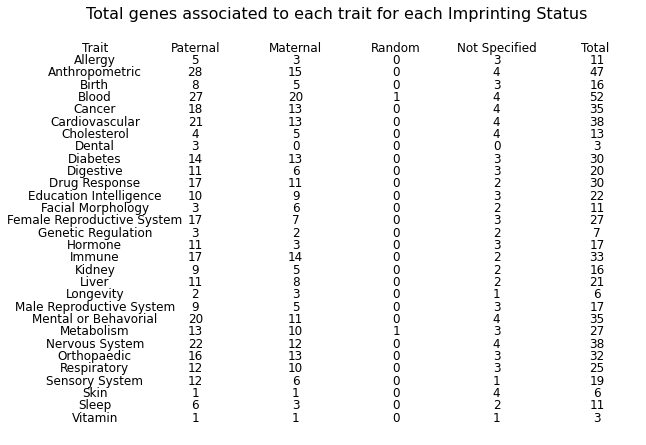

In [9]:
fig, ax = plt.subplots(nrows=31, ncols=6, figsize=(10.5,7))
fig.suptitle('Total genes associated to each trait for each Imprinting Status', fontsize=16)

ax[0, 0].set_title("Trait", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("Random", fontsize=12)
ax[0, 3].axis('off')
ax[0, 4].set_title("Not Specified", fontsize=12)
ax[0, 4].axis('off')
ax[0, 5].set_title("Total ", fontsize=12)
ax[0, 5].axis('off')
k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(paternal_imprint_total[i], fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(maternal_imprint_total[i], fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(random_imprint_total[i], fontsize=12)
    ax[k, 3].axis('off')
    ax[k, 4].set_title(notspecified_imprint_total[i], fontsize=12)
    ax[k, 4].axis('off')
    ax[k, 5].set_title(overall_imprint_total[i], fontsize=12)
    ax[k, 5].axis('off')
    
plt.savefig('Imprinting-Totals-Table.png')

Section 2: Whole Genome - Analysis

2.1 Seperate definiton for whole genome because requires text formatting

In [10]:
#Reusable definition to extract number of genes with each trait type
def convertMappedGenes(cat):
    #Import Data
    #Read CSV file
    #Data source - NHGRI, 2021. GWAS Catalog. [online] Ebi.ac.uk. Available at: <https://www.ebi.ac.uk/gwas/> [Accessed 31 July 2021].
    df = pd.read_csv("data/GWAS-Associations-%s.csv"%cat, names=column_names_all)
    #Saves Gene Collum to list
    genes = df.Gene.to_list()
    
    #Start - Formats genes text, splitting where there are multiple genes in a row, to indavidual genes per row
    #Array to store genes
    gene_array = []
    #Iterates through genes field, adding each gene to array while remove commas
    for unique in genes:
        #Splits mapped genes to seperate enes when multiple together
        split = unique.split()
        #Iterates through each idavidual gene
        for word in split:
            #Removes commas - Needs to be removed as will count same gene with and without comma as two genes
            split_gene = word.replace(',', '')
            #Removes semicolons - Needs to be removed as will count same gene with and without semicolon as two genes
            split_gene1 = split_gene.replace(';', '')
            #Adds indavidual gene to array without commas or semicolons
            gene_array.append(split_gene1)
    #Removes collumn heading from array
    gene_array.pop(0)
    gene_array.pop(0)
    #Finish - text formatting
    
    #Set makes a distinic list
    unique_array = set()
    #Convers list to set - set() only adds distinct values
    for x in gene_array:
        unique_array.add(x)
    #Gets number of entries    
    length = len(unique_array)
    #Adds to total array to ouput and save total of each trait
    totals_genome.append(length)

    #Coverts set back to list - set() cannot be saved as csv
    save = list(unique_array)
    #Adds collum heading to list for CSV file
    save.insert(0,"Unique Genes")
    #Saves a file, listing all the unique genes associated to trait - done primarly for testing
    np.savetxt("Output/Whole-Genome/%s.csv"%cat, save, delimiter =", ", fmt ='% s')
    
    #Prints trait then total number of unique genes
    print("{}: {}".format(cat, length))
    return

2.2 Find number of unique genes associated with each trait in the whole genome

In [11]:
#Clears total_genes array every time run to remove previous values
totals_genome = []
status = "Whole-Genome"
#Title for ouput in python
print("Unique Genes for each trait in whole genome")

#Allergy
#Name of catorgy file - catorgy names from array to prevent errors/typos used throughout
cat = traits[0]
#Calls definition
convertMappedGenes(cat)

#Repeats for remaining traits
#Anthropometric
cat = traits[1]
convertMappedGenes(cat)

#Birth
cat = traits[2]
convertMappedGenes(cat)

#Blood
cat = traits[3]
convertMappedGenes(cat)

#Cancer
cat = traits[4]
convertMappedGenes(cat)

#Cardiovascular
cat = traits[5]
convertMappedGenes(cat)

#Cholestol
cat = traits[6]
convertMappedGenes(cat)

#Dental
cat = traits[7]
convertMappedGenes(cat)

#Diabetes
cat = traits[8]
convertMappedGenes(cat)

#Digestive
cat = traits[9]
convertMappedGenes(cat)

#Drug-Response
cat = traits[10]
convertMappedGenes(cat)

#Education-Intelligence
cat = traits[11]
convertMappedGenes(cat)

#Facial-Morphology
cat = traits[12]
convertMappedGenes(cat)

#Female-Reproductive-System
cat = traits[13]
convertMappedGenes(cat)

#Genetic-Regulation
cat = traits[14]
convertMappedGenes(cat)

#Hormone
cat = traits[15]
convertMappedGenes(cat)

#Immune
cat = traits[16]
convertMappedGenes(cat)

#Kidney
cat = traits[17]
convertMappedGenes(cat)

#Liver
cat = traits[18]
convertMappedGenes(cat)

#Longevity
cat = traits[19]
convertMappedGenes(cat)

#Male Reproductive System
cat = traits[20]
convertMappedGenes(cat)

#Mental-Behavorial
cat = traits[21]
convertMappedGenes(cat)

#Metabolism
cat = traits[22]
convertMappedGenes(cat)

#Nervous-System
cat = traits[23]
convertMappedGenes(cat)

#Orthopaedic
cat = traits[24]
convertMappedGenes(cat)

#Respiratory
cat = traits[25]
convertMappedGenes(cat)

#Sensory-System
cat = traits[26]
convertMappedGenes(cat)

#Skin
cat = traits[27]
convertMappedGenes(cat)

#Sleep
cat = traits[28]
convertMappedGenes(cat)

#Vitamin
cat = traits[29]
convertMappedGenes(cat)

#Adds header to array for csv file
totals_genome.insert(0,"Total Genes")
#Saves csv file of totals
np.savetxt("Output/{}/Totals.csv".format(status), totals_genome, delimiter =", ", fmt ='% s')

Unique Genes for each trait in whole genome
Allergy: 485
Anthropometric: 7911
Birth: 414
Blood: 7881
Cancer: 5033
Cardiovascular: 7365
Cholesterol: 819
Dental: 258
Diabetes: 3011
Digestive: 4737
Drug-Response: 3929
Education-Intelligence: 3014
Facial-Morphology: 1596
Female-Reproductive-System: 2793
Genetic-Regulation: 1583
Hormone: 3033
Immune: 4732
Kidney: 1898
Liver: 2936
Longevity: 585
Male-Reproductive-System: 1511
Mental-Behavorial: 7268
Metabolism: 2079
Nervous-System: 6740
Orthopaedic: 3056
Respiratory: 2954
Sensory-System: 2469
Skin: 1870
Sleep: 1804
Vitamin: 384


Section 3: Anaylsis of Imprinted Genes and Whole Genome Differentiations

3.1 Calculates percentages of imprinting totals and whole genome

In [12]:
#Arrays to store percentages - Resets every time cell is run
per_paternal = []
per_maternal = []
per_random = []
per_notspecified = []
per_all = []
per_genome = []

#Irterates through each paternal total genes assocated to a trait and works out percentage
#Paternal
for n in paternal_imprint_total:
    #Calculates percentage
    #n is the total number of imprinted genes for a trait, no_paternal Genes is
    #the total number of Paternal imprinted genes
    final = (n/no_paternal) * 100.0
    #Prints pergentage to 2decimal places
    per_paternal.append(final)
np.savetxt("Output/Percentages/paternal.csv", per_paternal, delimiter =", ", fmt ='% s')

#Maternal
for n in maternal_imprint_total:
    final = (n/no_maternal) * 100.0
    per_maternal.append(final)
np.savetxt("Output/Percentages/maternal.csv", per_maternal, delimiter =", ", fmt ='% s')

#Random Imprinted
for n in random_imprint_total:
    #Calculates percentage
    final = (n/no_random) * 100.0
    per_random.append(final)
np.savetxt("Output/Percentages/random-imprint.csv", per_random, delimiter =", ", fmt ='% s')

#Not Specified
for n in notspecified_imprint_total:
    #Calculates percentage
    final = (n/no_notspecified) * 100.0
    per_notspecified.append(final)
np.savetxt("Output/Percentages/notspecified.csv", per_notspecified, delimiter =", ", fmt ='% s')

#Total of all imprinted
for n in overall_imprint_total:
    #Calculates percentage
    final = (n/no_imprint_genes) * 100.0
    per_all.append(final)
np.savetxt("Output/Percentages/all_imprinted.csv", per_all, delimiter =", ", fmt ='% s')
    
#Removes headers for whole genome array
for g in totals_genome:
    #If to check if headers have already been removed
    if g == "Total Genes":
        #Removes headers if they are there
        totals_genome.remove("Total Genes")
#Print to show have been removed successfully    

#Whole Genome
for n in totals_genome:
    #Calculates percentage
    final = (n/no_whole_genome) * 100.0
    #Prints pergentage to 2decimal places
    per_genome.append(final)
np.savetxt("Output/Percentages/whole-genome.csv", per_genome, delimiter =", ", fmt ='% s')

3.2 Produces figures of percentage of genes associated to trait within imprinting status and whole genome

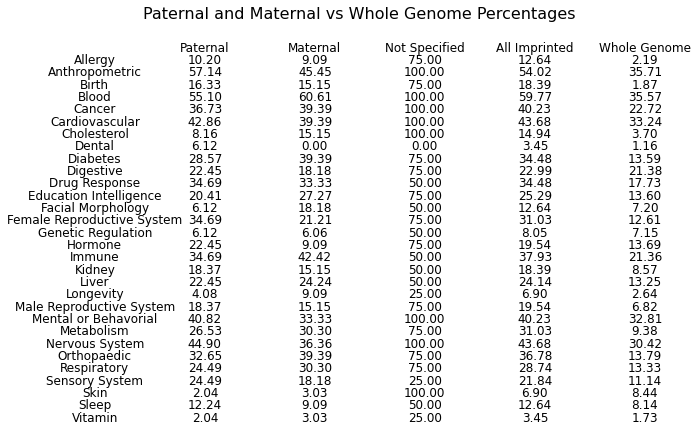

In [13]:
fig, ax = plt.subplots(nrows=31, ncols=6, figsize=(11.5,7))
fig.suptitle('Paternal and Maternal vs Whole Genome Percentages', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("Not Specified", fontsize=12)
ax[0, 3].axis('off')
ax[0, 4].set_title("All Imprinted", fontsize=12)
ax[0, 4].axis('off')
ax[0, 5].set_title("Whole Genome", fontsize=12)
ax[0, 5].axis('off')

k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(per_paternal[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(per_maternal[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(format(per_notspecified[i],".2f"), fontsize=12)
    ax[k, 3].axis('off')
    ax[k, 4].set_title(format(per_all[i],".2f"), fontsize=12)
    ax[k, 4].axis('off')
    ax[k, 5].set_title(format(per_genome[i],".2f"), fontsize=12)
    ax[k, 5].axis('off')
    
plt.savefig('Imprinting-vs-Whole-Genome-Percentages.png')

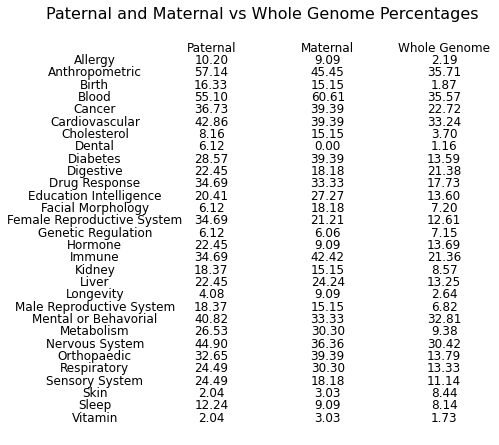

In [30]:
fig, ax = plt.subplots(nrows=31, ncols=4, figsize=(8,7))
fig.suptitle('Paternal and Maternal vs Whole Genome Percentages', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("Whole Genome", fontsize=12)
ax[0, 3].axis('off')

k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(per_paternal[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(per_maternal[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(format(per_genome[i],".2f"), fontsize=12)
    ax[k, 3].axis('off')
    
plt.savefig('Paternal-Maternal-vs-Whole-Genome-Percentages.png')

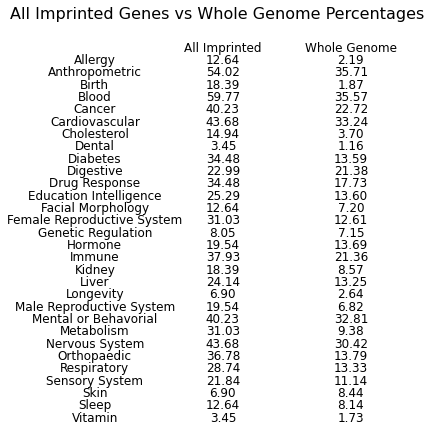

In [15]:
fig, ax = plt.subplots(nrows=31, ncols=3, figsize=(6.5,7))
fig.suptitle('All Imprinted Genes vs Whole Genome Percentages', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("All Imprinted", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Whole Genome", fontsize=12)
ax[0, 2].axis('off')

k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(per_all[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(per_genome[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    
plt.savefig('All-Imprinted-vs-Whole-Genome-Percentages.png')

Section 4: Random Gene - Analysis

4.1 Random gene generator to select genes

In [16]:
#Reads in CSV file
col_name_random = ["Gene"]
df = pd.read_csv("data/list-for-random-selection.csv", names=col_name_random)
#Stores genes and phenotype group to lists
genes = df.Gene.to_list()

In [67]:
#Will give diffrent results if re-run
#selected_random = random.sample(genes, 91)
#print(selected_random)
#selected_random.insert(0,"Randomly chosen genes")
#np.savetxt("Output/random-chosen-genes-2.csv", selected_random, delimiter =", ", fmt ='% s')

['S100A11', 'GSKIP', 'SLC16A1', 'HIF1A-AS1', 'C11orf71', 'MRPL40P1', 'ALG1L13P', 'SLC38A10', 'TF', 'PRC1', 'ARHGAP24', 'ADGRG2', 'FCGR2A', 'CHL1', 'H2AC6', 'CDKN2AIP', 'RN7SL252P', 'UROS', 'GUCY1A1', 'LINC02574', 'ADH1A', 'MYO1B', 'PCDHGA2', 'TAF1A-AS1', 'GAPDHP67', 'DTD1', 'OR51B5', 'MGST1', 'APOB', 'AP1S1', 'EIF3L', 'LINC00382', 'CHRNA1', 'SMURF2', 'COL4A2-AS2', 'PPM1K', 'TGM3', 'NDST1', 'PDGFD', 'PROM1', 'CD8B2', 'LINC00578', 'NANOS3', 'SLC22A4', 'TNIP1', 'SSBP4', 'PSMG4', 'RCN2', 'TUBB4BP4', 'KC6', 'HS3ST1', 'COQ10B', 'NONOP2', 'LINC02502', 'DNM3', 'TNNI3K', 'TMEM45B', 'PSMC5', 'THAP3', 'FGF8', 'RPS3AP5', 'OR5H8', 'DCAF6', 'RNU5E-5P', 'RN7SL824P', 'LINC00308', 'GIMAP1-GIMAP5', 'LINC02414', 'FAM180B', 'PMAIP1', 'PHF2', 'KHSRPP1', 'FGF12', 'DNAJC9', 'AP3M2', 'DPP7', 'VIRMA', 'RBM25', 'WDR86', 'IL20RB', 'NKPD1', 'YWHAZP2', 'CCDC201', 'ROR1', 'KDM4A-AS1', 'TCF19', 'SPTBN4']


4.2 Find number of randomly selected genes associated to traits

In [17]:
total_genes = []
#Names output folder for lists of unique genes
status = "Random-Selection-Genes"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Random selection of genes total assocations for each trait")

#Names trait
cat = "Allergy"
#Selects allergy rows of list
start, stop = 1, 12
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Anthropometric
cat = traits[1]
start, stop = 12, 278
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 278, 281
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 281, 608
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 608, 700
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 700, 970
findUniqueGenes(status, col_names, cat, start, stop)

#Cholestol
cat = traits[6]
start, stop = 970, 1282
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 1282, 1285
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 1285, 1326
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive
cat = traits[9]
start, stop = 1326, 1361
findUniqueGenes(status, col_names, cat, start, stop)

#Drug-Response
cat = traits[10]
start, stop = 1361, 1391
findUniqueGenes(status, col_names, cat, start, stop)

#Education-Intelligence
cat = traits[11]
start, stop = 1391, 1474
findUniqueGenes(status, col_names, cat, start, stop)

#Facial-Morphology
cat = traits[12]
start, stop = 1474, 1497
findUniqueGenes(status, col_names, cat, start, stop)

#Female-Reproductive-System
cat = traits[13]
start, stop = 1497, 1526
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic-Regulation
cat = traits[14]
start, stop = 1526, 1536
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 1536, 1550
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 1550, 1664
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 1664, 1686
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 1686, 1728
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 1728, 1732
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 1732, 1741
findUniqueGenes(status, col_names, cat, start, stop)

#Mental-Behavorial
cat = traits[21]
start, stop = 1741, 1867
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 1867, 1980
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous-System
cat = traits[23]
start, stop = 1980, 2050
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 2050, 2086
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 2086, 2119
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory-System
cat = traits[26]
start, stop = 2119, 2142
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 2142, 2185
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 2185, 2206
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 2206, 2219
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n  
random_genes_total = total_genes
save = random_genes_total
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Random Genes: ",sum)

Random selection of genes total assocations for each trait
Allergy: 5
Anthropometric: 33
Birth: 3
Blood: 44
Cancer: 31
Cardiovascular: 27
Cholesterol: 11
Dental: 2
Diabetes: 11
Digestive: 15
Drug-Response: 16
Education-Intelligence: 25
Facial-Morphology: 13
Female-Reproductive-System: 11
Genetic-Regulation: 5
Hormone: 8
Immune: 31
Kidney: 8
Liver: 21
Longevity: 3
Male-Reproductive-System: 5
Mental-Behavorial: 33
Metabolism: 16
Nervous-System: 33
Orthopaedic: 15
Respiratory: 21
Sensory-System: 14
Skin: 11
Sleep: 13
Vitamin: 5

Total Random Genes:  489


Section 5: Anaylsis of Imprinted Genes and Random Selection of Gene Differentiations

5.1 Finds what percentage of each trait type is made up of imprinted or randomly selected genes

In [18]:
#Arrays to hole percentage of trait made up of each imprinted or random gene
paternal_imprint_comprasion =[]
maternal_imprint_comprasion =[]
overall_imprint_comprasion =[]
random_comprasion =[]

#Resets count
count = 0
for n in paternal_imprint_total:
    #Calculates percentage
    #n is number from paternal imprint total for trait, 
    #totals_traits is total number of traits for that trait type
    final = (n/totals_genome[count]) * 100.0
    #Adds percentage to array
    paternal_imprint_comprasion.append(final)
    #Prints pergentage to 2decimal places
    count += 1
np.savetxt("Output/Random-comprasion/Percentages-Paternal.csv", paternal_imprint_comprasion, delimiter =", ", fmt ='% s')

count = 0
for n in maternal_imprint_total:
    #Calculates percentage
    final = (n/totals_genome[count]) * 100.0
    #Prints pergentage to 2decimal places
    maternal_imprint_comprasion.append(final)
    count += 1  
np.savetxt("Output/Random-comprasion/Percentages-Maternal.csv", maternal_imprint_comprasion, delimiter =", ", fmt ='% s')

count = 0
for n in overall_imprint_total:
    #Calculates percentage
    final = (n/totals_genome[count]) * 100.0
    #Prints pergentage to 2decimal places
    overall_imprint_comprasion.append(final)
    count += 1
np.savetxt("Output/Random-comprasion/Percentages-Total-Imprint.csv", overall_imprint_comprasion, delimiter =", ", fmt ='% s')

count = 0
#Removes header from Random Genes array
for g in random_genes_total:
    #If statement to check if headers have already been removed
    if g == "Total Genes":
        #Removes headers if they are there
        random_genes_total.remove("Total Genes")

for n in random_genes_total:
    #Calculates percentage
    final = (n/totals_genome[count]) * 100.0
    #Prints pergentage to 2decimal places
    random_comprasion.append(final)
    count += 1
np.savetxt("Output/Random-comprasion/Perctanges-Random-Genes.csv", random_comprasion, delimiter =", ", fmt ='% s')

5.2 Produces figure of percentage comprasion of what percentage of each catergory traits belongs to paternal, maternal, all imprinted or random

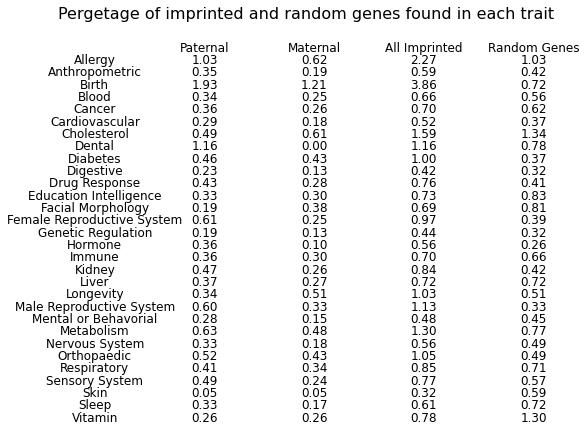

In [19]:
fig, ax = plt.subplots(nrows=31, ncols=5, figsize=(9.5,7))
fig.suptitle('Pergetage of imprinted and random genes found in each trait', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("All Imprinted", fontsize=12)
ax[0, 3].axis('off')
ax[0, 4].set_title("Random Genes", fontsize=12)
ax[0, 4].axis('off')
k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    #Prints percentage to two decimal places
    ax[k, 1].set_title(format(paternal_imprint_comprasion[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(maternal_imprint_comprasion[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(format(overall_imprint_comprasion[i],".2f"), fontsize=12)
    ax[k, 3].axis('off')
    ax[k, 4].set_title(format(random_comprasion[i],".2f"), fontsize=12)
    ax[k, 4].axis('off')
    
plt.savefig('Imprinted-All-Statuses-Random-Comparsion.png')

5.3 Produces figure of percentage comprasion of what percentage of each catergory traits belongs to all imprinted or random

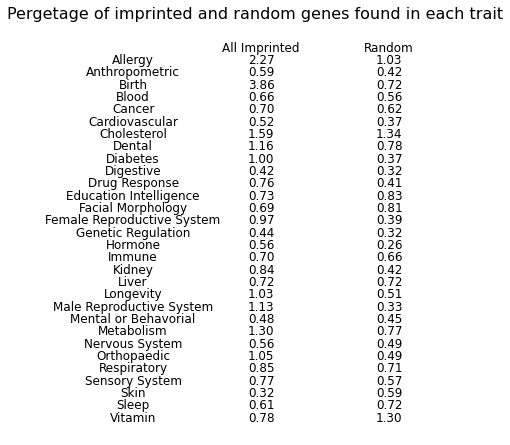

In [20]:
fig, ax = plt.subplots(nrows=31, ncols=3, figsize=(6.5,7))
fig.suptitle('Pergetage of imprinted and random genes found in each trait', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("All Imprinted", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Random", fontsize=12)
ax[0, 2].axis('off')

k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(overall_imprint_comprasion[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(random_comprasion[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    
plt.savefig('Imprinted-Random-Comparsion.png')

Section 6: LoF Rare Variant - Analysis

6.1 Find paternal LoF number of genes to trait

In [21]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Paternal-LoF"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Paternal LoF total gene assocations for each trait")

#Allergy
#Names trait
cat = traits[0]
#Selects allergy rows of list. Start and Stop choose which rows to use
start, stop = 1, 1
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Repeats for remaining traits
#Anthropometric
cat = traits[1]
start, stop = 1, 4
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 4, 4
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 4, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 5, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 6, 8
findUniqueGenes(status, col_names, cat, start, stop)

#Cholestol
cat = traits[6]
start, stop = 8, 8
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 8, 8
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 8, 8
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive
cat = traits[9]
start, stop = 8, 8
findUniqueGenes(status, col_names, cat, start, stop)

#Drug-Response
cat = traits[10]
start, stop = 8, 10
findUniqueGenes(status, col_names, cat, start, stop)

#Education-Intelligence
cat = traits[11]
start, stop = 10, 10
findUniqueGenes(status, col_names, cat, start, stop)

#Facial-Morphology
cat = traits[12]
start, stop = 10, 10
findUniqueGenes(status, col_names, cat, start, stop)

#Female-Reproductive-System
cat = traits[13]
start, stop = 10, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic-Regulation
cat = traits[14]
start, stop = 11, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 11, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 11, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 11, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 11, 11
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 11, 12
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 12, 13
findUniqueGenes(status, col_names, cat, start, stop)

#Mental-Behavorial
cat = traits[21]
start, stop = 13, 21
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 21, 21
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous-System
cat = traits[23]
start, stop = 21, 25
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 25, 25
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 25, 27
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory-System
cat = traits[26]
start, stop = 27, 28
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 28, 28
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 28, 28
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 28, 28
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n
#Saves totals to list for use later
paternal_lof_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Paternal: ",sum)

Paternal LoF total gene assocations for each trait
Allergy: 0
Anthropometric: 1
Birth: 0
Blood: 1
Cancer: 1
Cardiovascular: 1
Cholesterol: 0
Dental: 0
Diabetes: 0
Digestive: 0
Drug-Response: 2
Education-Intelligence: 0
Facial-Morphology: 0
Female-Reproductive-System: 1
Genetic-Regulation: 0
Hormone: 0
Immune: 0
Kidney: 0
Liver: 0
Longevity: 1
Male-Reproductive-System: 1
Mental-Behavorial: 5
Metabolism: 0
Nervous-System: 3
Orthopaedic: 0
Respiratory: 2
Sensory-System: 1
Skin: 0
Sleep: 0
Vitamin: 0

Total Paternal:  20


6.2 Find maternal LoF number of genes to trait

In [22]:
#Clears total_genes array every time run to remove previous values
total_genes = []
#Names output folder for lists of unique genes
status = "Maternal-LoF"
#Sets columns to be used in import
col_names = column_names_general
#Title for ouput in python
print("Maternal LoF total gene assocations for each trait")

#Allergy
#Names trait
cat = traits[0]
#Selects allergy rows of list. Start and Stop choose which rows to use
start, stop = 1, 1
#Passes imprinting status, trait caterogy, start selection and stop selection to definition
findUniqueGenes(status, col_names, cat, start, stop)

#Repeats for remaining traits
#Anthropometric
cat = traits[1]
start, stop = 1, 2
findUniqueGenes(status, col_names, cat, start, stop)

#Birth
cat = traits[2]
start, stop = 2, 2
findUniqueGenes(status, col_names, cat, start, stop)

#Blood
cat = traits[3]
start, stop = 2, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Cancer
cat = traits[4]
start, stop = 5, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Cardiovascular
cat = traits[5]
start, stop = 5, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Cholestol
cat = traits[6]
start, stop = 5, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Dental
cat = traits[7]
start, stop = 5, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Diabetes
cat = traits[8]
start, stop = 5, 5
findUniqueGenes(status, col_names, cat, start, stop)

#Digestive
cat = traits[9]
start, stop = 5, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Drug-Response
cat = traits[10]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Education-Intelligence
cat = traits[11]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Facial-Morphology
cat = traits[12]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Female-Reproductive-System
cat = traits[13]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Genetic-Regulation
cat = traits[14]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Hormone
cat = traits[15]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Immune
cat = traits[16]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Kidney
cat = traits[17]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Liver
cat = traits[18]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Longevity
cat = traits[19]
start, stop = 6, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Male Reproductive System
cat = traits[20]
start, stop = 12, 6
findUniqueGenes(status, col_names, cat, start, stop)

#Mental-Behavorial
cat = traits[21]
start, stop = 6, 15
findUniqueGenes(status, col_names, cat, start, stop)

#Metabolism
cat = traits[22]
start, stop = 15, 15
findUniqueGenes(status, col_names, cat, start, stop)

#Nervous-System
cat = traits[23]
start, stop = 15, 16
findUniqueGenes(status, col_names, cat, start, stop)

#Orthopaedic
cat = traits[24]
start, stop = 16, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Respiratory
cat = traits[25]
start, stop = 18, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Sensory-System
cat = traits[26]
start, stop = 18, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Skin
cat = traits[27]
start, stop = 18, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Sleep
cat = traits[28]
start, stop = 18, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Vitamin
cat = traits[29]
start, stop = 18, 18
findUniqueGenes(status, col_names, cat, start, stop)

#Resets sum of total
sum = 0
#Iterates through totals array, adding each value to sum to get total
for n in total_genes:
    sum += n
#Saves totals to list for use later
maternal_lof_total = total_genes
save = total_genes
save.insert(0,"Total Genes")
#Saves total number of genes associated to each trait to csv file
np.savetxt("Output/{}/Totals.csv".format(status), save, delimiter =", ", fmt ='% s')
print()
print("Total Maternal: ",sum)

Maternal LoF total gene assocations for each trait
Allergy: 0
Anthropometric: 1
Birth: 0
Blood: 1
Cancer: 0
Cardiovascular: 0
Cholesterol: 0
Dental: 0
Diabetes: 0
Digestive: 1
Drug-Response: 0
Education-Intelligence: 0
Facial-Morphology: 0
Female-Reproductive-System: 0
Genetic-Regulation: 0
Hormone: 0
Immune: 0
Kidney: 0
Liver: 0
Longevity: 0
Male-Reproductive-System: 0
Mental-Behavorial: 8
Metabolism: 0
Nervous-System: 1
Orthopaedic: 2
Respiratory: 0
Sensory-System: 0
Skin: 0
Sleep: 0
Vitamin: 0

Total Maternal:  14


6.3 Removes array headers

In [23]:
#Removes headers
for g in paternal_lof_total:
    #If Statement to check if headers have already been removed
    if g == "Total Genes":
        #Removes headers if they are there
        paternal_lof_total.remove("Total Genes")
        maternal_lof_total.remove("Total Genes")

#Calculates total imprints for each trait and saves to array
overall_lof_total = []
for i in range(30):
    #Adds each status array together and appends to array
    overall_lof_total.append(paternal_lof_total[i] + maternal_lof_total[i]) 

6.4 Makes arrays for LoF outputs that exclude 0 total values

In [24]:
#Count to index other arrays
count = 0
#Clears arrays each time run
new_lof_traits = []
new_lof_paternal = []
new_lof_maternal = []
new_lof_total = []
#Finds each total value which is not 0
for n in overall_lof_total:
    if n > 0:
        #Appends corrosponding index from each array
        new_lof_traits.append(output_traits[count])
        new_lof_paternal.append(paternal_lof_total[count])
        new_lof_maternal.append(maternal_lof_total[count])
        new_lof_total.append(n)
    count +=1

6.5 Produces figure of Paternal, Maternal and All Lof number of genes associated to each trait

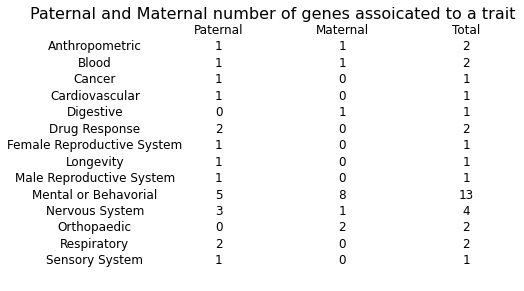

In [25]:
fig, ax = plt.subplots(nrows=15, ncols=4, figsize=(8.5,4.5))
fig.suptitle('Paternal and Maternal number of genes assoicated to a trait', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("Total", fontsize=12)
ax[0, 3].axis('off')

k = 0
for i in range(14):
    k = i+1
    ax[k, 0].set_title(new_lof_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(new_lof_paternal[i], fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(new_lof_maternal[i], fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(new_lof_total[i], fontsize=12)
    ax[k, 3].axis('off')
    
plt.savefig('Found_Paternal_Maternal_Lof_Gene_Associations.png')

6.6 Find percentages for pLof Variants

In [26]:

per_lof_paternal = []
per_lof_maternal = []
per_lof_total = []

#Paternal LoF
for n in new_lof_paternal:
    #Calculates percentage
    final = (n/no_lof_paternal) * 100.0
    #Prints pergentage to 2decimal places
    per_lof_paternal.append(final)
np.savetxt("Output/Percentages/LoF_paternal.csv", per_lof_paternal, delimiter =", ", fmt ='% s')

#Maternal LoF
for n in new_lof_maternal:
    #Calculates percentage
    final = (n/no_lof_maternal) * 100.0
    #Prints pergentage to 2decimal places
    per_lof_maternal.append(final)
np.savetxt("Output/Percentages/LoF_maternal.csv", per_lof_maternal, delimiter =", ", fmt ='% s')
#Total LoF
for n in new_lof_total:
    #Calculates percentage
    final = (n/no_lof_total) * 100.0
    #Prints pergentage to 2decimal places
    per_lof_total.append(final)
np.savetxt("Output/Percentages/LoF_total.csv", per_lof_total, delimiter =", ", fmt ='% s')

6.7 Produces figure of percentage of LoF genes associated to trait within Paternal, Maternal and Total

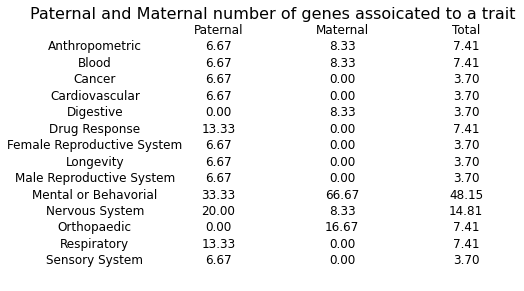

In [27]:
fig, ax = plt.subplots(nrows=15, ncols=4, figsize=(8.5,4.5))
fig.suptitle('Paternal and Maternal number of genes assoicated to a trait', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("Paternal", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("Maternal", fontsize=12)
ax[0, 2].axis('off')
ax[0, 3].set_title("Total", fontsize=12)
ax[0, 3].axis('off')

k = 0
for i in range(14):
    k = i+1
    ax[k, 0].set_title(new_lof_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(per_lof_paternal[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(per_lof_maternal[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')
    ax[k, 3].set_title(format(per_lof_total[i],".2f"), fontsize=12)
    ax[k, 3].axis('off')
    
plt.savefig('Percentages_Paternal_Maternal_Lof_Gene_Associations.png')

6.8 Produces figure of percentage comparsion between total GWAS and Genebass associations to traits

In [28]:
per_GWAS_lof_paternal = []
per_GWAS_lof_maternal = []
per_GWAS_lof_total = []

#Paternal LoF
for n in paternal_lof_total:
    #Calculates percentage
    #Uses orginal total LoF arrays
    final = (n/no_lof_paternal) * 100.0
    #Prints pergentage to 2decimal places
    per_GWAS_lof_paternal.append(final)

#Maternal LoF
for n in maternal_lof_total:
    #Calculates percentage
    final = (n/no_lof_maternal) * 100.0
    #Prints pergentage to 2decimal places
    per_GWAS_lof_maternal.append(final)

#Total LoF
for n in overall_lof_total:
    #Calculates percentage
    final = (n/no_lof_total) * 100.0
    #Prints pergentage to 2decimal places
    per_GWAS_lof_total.append(final)

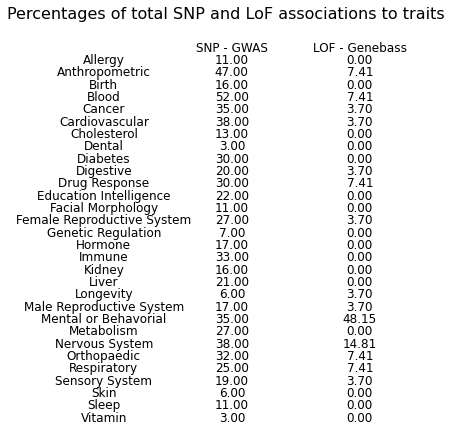

In [29]:
fig, ax = plt.subplots(nrows=31, ncols=3, figsize=(6.5,7))
fig.suptitle('Percentages of total SNP and LoF associations to traits', fontsize=16)

ax[0, 0].set_title("", fontsize=12)
ax[0, 0].axis('off')
ax[0, 1].set_title("SNP - GWAS", fontsize=12)
ax[0, 1].axis('off')
ax[0, 2].set_title("LOF - Genebass", fontsize=12)
ax[0, 2].axis('off')

k = 0
for i in range(30):
    k = i+1
    ax[k, 0].set_title(output_traits[i], fontsize=12)
    ax[k, 0].axis('off')
    ax[k, 1].set_title(format(overall_imprint_total[i],".2f"), fontsize=12)
    ax[k, 1].axis('off')
    ax[k, 2].set_title(format(per_GWAS_lof_total[i],".2f"), fontsize=12)
    ax[k, 2].axis('off')

plt.savefig('Percentages_SNP_Lof_Comparsion_Associations.png')